In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Starbucks prediction

/content/drive/MyDrive/Colab Notebooks/Starbucks prediction


In [3]:
!ls


'Copy of Software Technology.ipynb'   SBUX.US_D1.csv  'Software Technology.ipynb'
 linear_regression_model.joblib       SBUX.US_H1.csv


In [4]:
import warnings
warnings.filterwarnings('ignore')



#Importing Packages and Libraries. Reading the dataset.#





In [17]:
import pandas as pd
import numpy as np

s_bux = pd.read_csv("s_bux.csv")






#First import the required libraries for data visualization

#Next setting size of the plot to be created

#Creating histogram plot using seaborn function

#The data used is the close column from dataset

#Adding a title to the plot to describe the content of the visualization





Text(0.5, 1.0, 'Distribution of Closing Prices (Daily Data)')

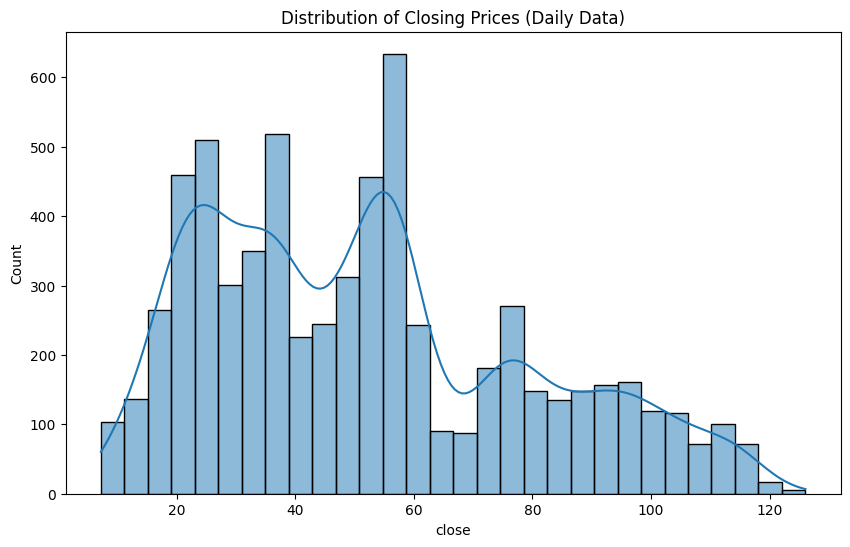

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(s_bux['close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices (Daily Data)')



#Next Generating descripting statistics

#Then Displaying the first five rows of the 'datetime' column from the DataFrame

#Now Converting the 'datetime' column to a datetime data type which is suitable




In [19]:
s_bux.describe()
s_bux.info()
s_bux['datetime'].head()
s_bux['datetime'] = pd.to_datetime(s_bux['datetime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6639 entries, 0 to 6638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6639 non-null   object 
 1   open      6639 non-null   float64
 2   high      6639 non-null   float64
 3   low       6639 non-null   float64
 4   close     6639 non-null   float64
 5   volume    6639 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.3+ KB




#Generating Heating map for starbucks using sns heatmap




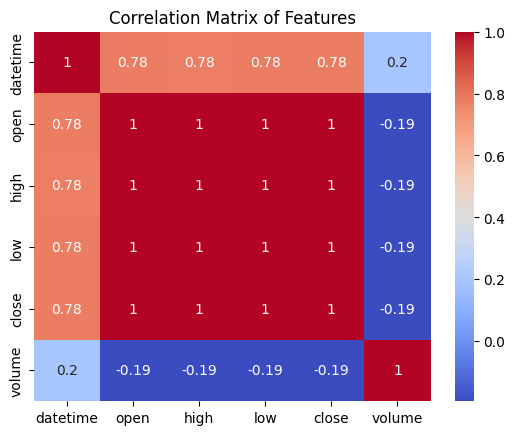

In [20]:
sns.heatmap(s_bux.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()





#To identify and reject unwanted coloumns, if "yes it will remove"



In [21]:
print(s_bux.columns)
if 'entry_id' in s_bux.columns:
    s_bux.drop('entry_id', axis=1, inplace=True)
    print("'entry_id' column removed.")
else:
    print("Column 'entry_id' does not exist.")



Index(['datetime', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Column 'entry_id' does not exist.





#To converting datetime columns to objects for datasets then checking the missing values and duplicate entries





In [22]:
s_bux['datetime'] = pd.to_datetime(s_bux['datetime'])

missing_values_d1 = s_bux.isnull().sum()

duplicate_entries_d1 = s_bux.duplicated().sum()


missing_values_d1, duplicate_entries_d1

(datetime    0
 open        0
 high        0
 low         0
 close       0
 volume      0
 dtype: int64,
 0)




#Creating a daily statistical summary for Starbucks data.

#Next to make a line plot showing how closing prices change over time.

#The plot is 14 units long and 7 units high, with 'datetime' on the x-axis and 'close' on the y-axis. .

#Adding a title, label axes, include a legend, and use `plt.show()` to display the plot.









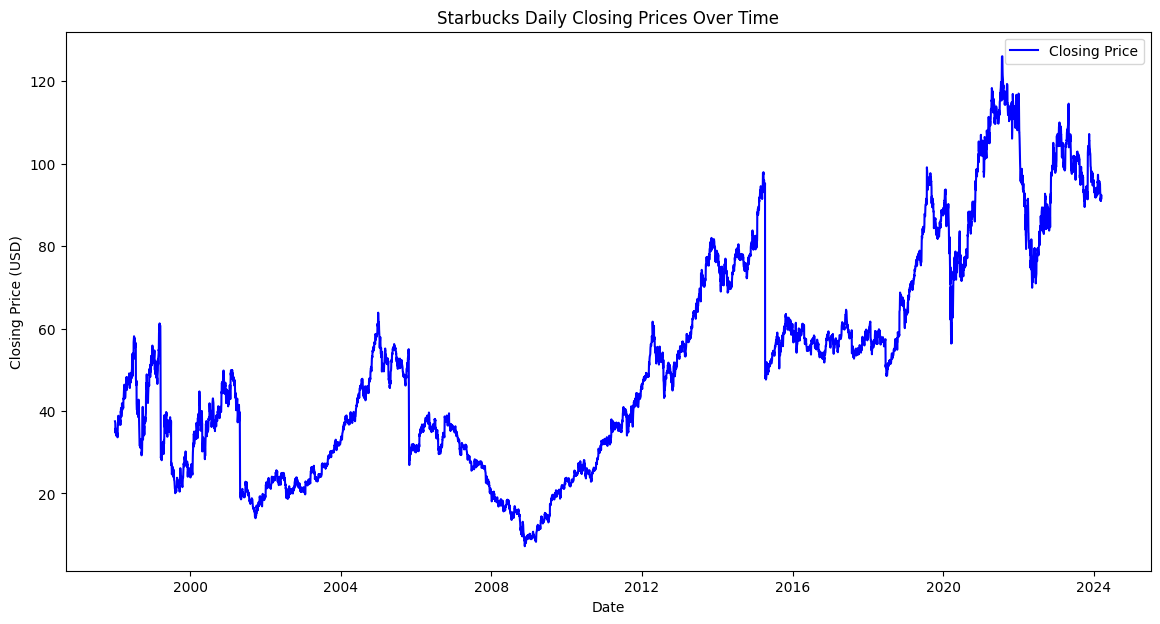

,datetime,open,high,low,close,volume
count,6639,6639.000000,6639.000000,6639.000000,6639.000000,6.639000e+03
mean,2011-03-10 09:03:46.118391296,52.025905,52.605072,51.438399,52.034272,5.793768e+06
min,1998-01-02 00:00:00,7.520000,7.900000,7.060000,7.200000,3.000000e+02
25%,2004-08-10 12:00:00,29.735000,30.130000,29.290000,29.665000,2.875130e+06
50%,2011-03-14 00:00:00,49.340000,50.000000,48.660000,49.400000,4.693841e+06
75%,2017-10-14 12:00:00,71.500000,72.215000,70.680000,71.390000,7.301760e+06
max,2024-03-13 00:00:00,126.080000,126.320000,124.810000,126.060000,7.234445e+07
std,NaN,27.161870,27.312972,26.994025,27.155434,4.658699e+06


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


statistical_summary_d1 = s_bux.describe()
plt.figure(figsize=(14, 7))
plt.plot(s_bux['datetime'], s_bux['close'], label='Closing Price', color='blue')
plt.title('Starbucks Daily Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

statistical_summary_d1




#It converts datetime data then adds a column for the day of the week.

#Next it prints the DataFrame's columns and creates a bar plot showing average closing prices for each day of the week.

#This helps spot weekly trends. Finally, it displays the plot with appropriate labels.







Index(['datetime', 'open', 'high', 'low', 'close', 'volume', 'day_of_week'], dtype='object')


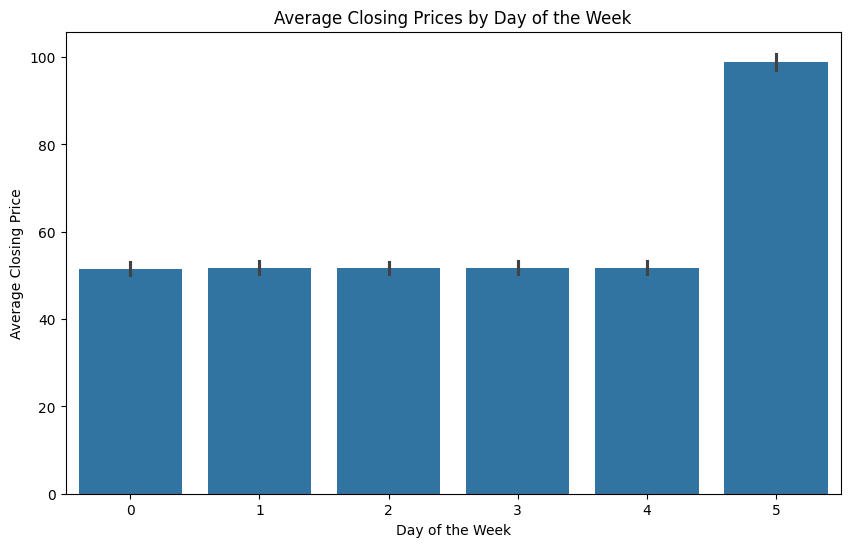

In [24]:
s_bux['datetime'] = pd.to_datetime(s_bux['datetime'])
s_bux['day_of_week'] = s_bux['datetime'].dt.dayofweek
print(s_bux.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='close', data=s_bux)
plt.title('Average Closing Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Closing Price')
plt.show()




#It is a (14,7) plot that represents trading volume data with a green line and date indications for x and volume for y.

#Then charted as "Starbucks Daily Trading Volume Over Time" with a legend, "Trading Volume."





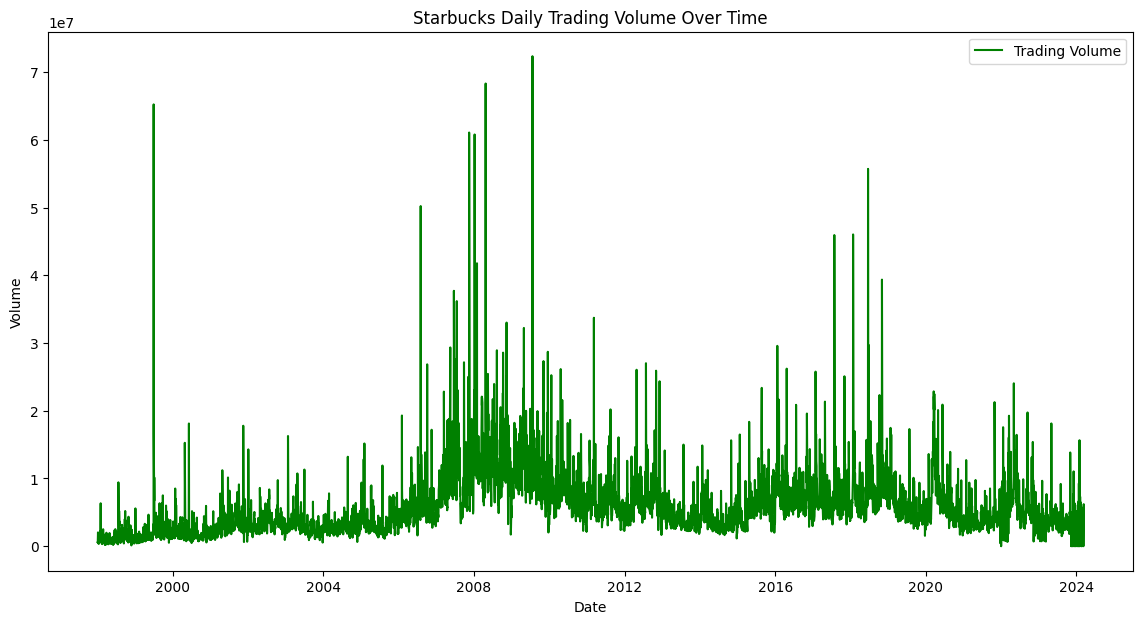

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(s_bux['datetime'], s_bux['volume'], label='Trading Volume', color='green')
plt.title('Starbucks Daily Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()




#first data convernsion for day, week, month

#Handling outliers for the upperbound and lowerbound followed by the filtering data

#Data splitting for the features and target displaying high, low, volume, day,month, year

#setting up the k-fold validation

#then model training and evaluation of k-fold validation

#evaluate the best models




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

s_bux['datetime'] = pd.to_datetime(s_bux['datetime'])
s_bux['day_of_week'] = s_bux['datetime'].dt.dayofweek
s_bux['month'] = s_bux['datetime'].dt.month
s_bux['year'] = s_bux['datetime'].dt.year

Q1, Q3 = s_bux['close'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
filtered_s_bux = s_bux[(s_bux['close'] >= lower_bound) & (s_bux['close'] <= upper_bound)]

X = filtered_s_bux[['open', 'high', 'low', 'volume', 'day_of_week', 'month', 'year']]
y = filtered_s_bux['close']

kf = KFold(n_splits=5, random_state=42, shuffle=True)
feature_names = X.columns
coefficient_list = []

def evaluate_model(model, X, y, collect_coefficients=False):
    rmse_scores = []
    coefficients = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse_scores.append(mean_squared_error(y_test, predictions, squared=False))

        if collect_coefficients:
            coefficients.append(model.coef_)

    if collect_coefficients:
        average_coefficients = np.mean(coefficients, axis=0)
        return np.mean(rmse_scores), average_coefficients
    return np.mean(rmse_scores)

lr_rmse, lr_coefficients = evaluate_model(LinearRegression(), X, y, True)
rf_rmse = evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X, y)

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")



Linear Regression RMSE: 0.37690123874566667
Random Forest RMSE: 0.480347736379746





#create the dataframe for feature importance

#Plotting the feature importance

#calculate the absolute values

#Sort features by absolute coefficient value in descending order

#Plotting the feature importance






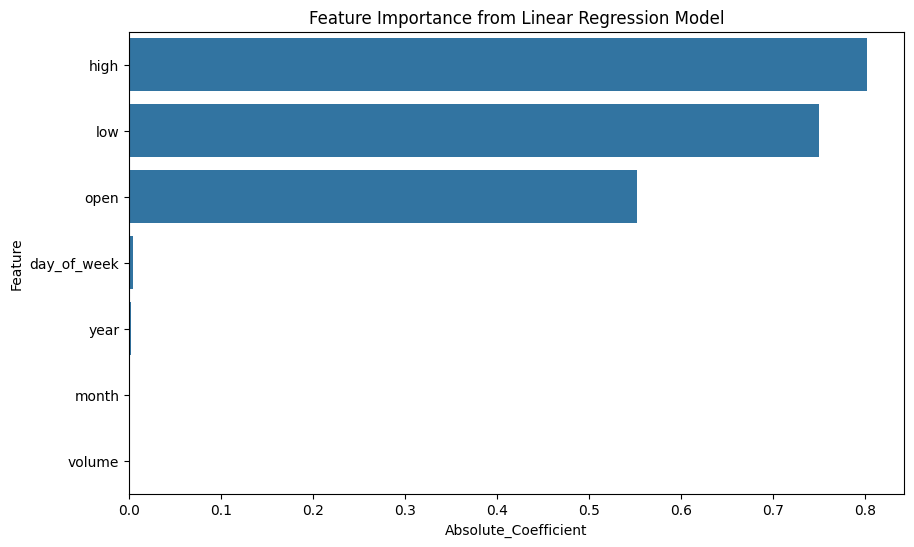

In [27]:
model = LinearRegression()
model.fit(X, y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

importance['Absolute_Coefficient'] = importance['Coefficient'].abs()

sorted_imp = importance.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=sorted_imp)
plt.title('Feature Importance from Linear Regression Model')
plt.show()

#Train the model on the entire dataset.


#Save the model to disk

In [29]:
import joblib


model = LinearRegression()
model.fit(X, y)


joblib.dump(model, 'linear_regression_model.joblib')


['linear_regression_model.joblib']